In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame({
    "Age": [12, 24, 32, 45, 16, 26, 63, 17, 9, 22],
    "Eligiility": [0, 1, 1, 1, 0, 1, 1, 0, 0, 1]
})
df

,Age,Eligiility
0,12,0
1,24,1
2,32,1
3,45,1
4,16,0
5,26,1
6,63,1
7,17,0
8,9,0
9,22,1


In [3]:
x = df[['Age']]
y = df['Eligiility']

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [6]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [13]:
y_probs = model.predict_proba(x_scaled)[:, 1]

In [16]:
threshold = 0.5

y_pred = (y_probs >= threshold).astype(int)

In [17]:
results = pd.DataFrame({
    "Age": df['Age'].values,
    "Predicted Probs": y_pred,
    f"Prediction (Threshold={threshold})": y_pred
})
results

,Age,Predicted Probs,Prediction (Threshold=0.5)
0,12,0,0
1,24,1,1
2,32,1,1
3,45,1,1
4,16,0,0
5,26,1,1
6,63,1,1
7,17,0,0
8,9,0,0
9,22,1,1


In [19]:
x_vals = np.linspace(-3, 3, 300).reshape(-1, 1)
y_probs_line = model.predict_proba(x_vals)[:, 1]

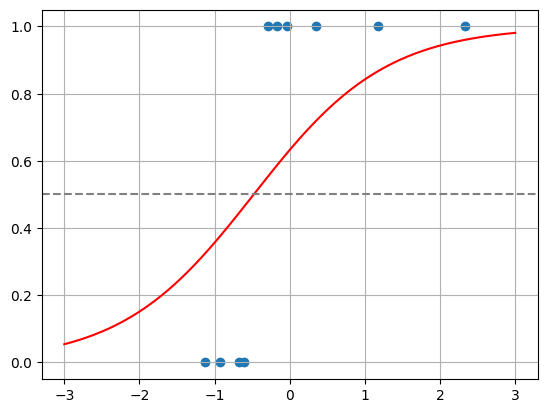

In [ ]:
plt.plot(x_vals, y_probs_line, "r")
plt.scatter(x_scaled, y_pred)
plt.axhline(0.5, color='gray', linestyle="--")

plt.grid(True)
plt.show()